<center>
    <h1>Mohamed Nasser Aboelnasr</h1>
</center>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("iris.data", names=["sepal length", "sepal width", "petal length", "petal width", "class"])

In [3]:
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [7]:
df.corr()

,sepal length,sepal width,petal length,petal width
sepal length,1.000000,-0.109369,0.871754,0.817954
sepal width,-0.109369,1.000000,-0.420516,-0.356544
petal length,0.871754,-0.420516,1.000000,0.962757
petal width,0.817954,-0.356544,0.962757,1.000000


In [8]:
# checking for the balance of the target labels
df['class'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: class, dtype: int64

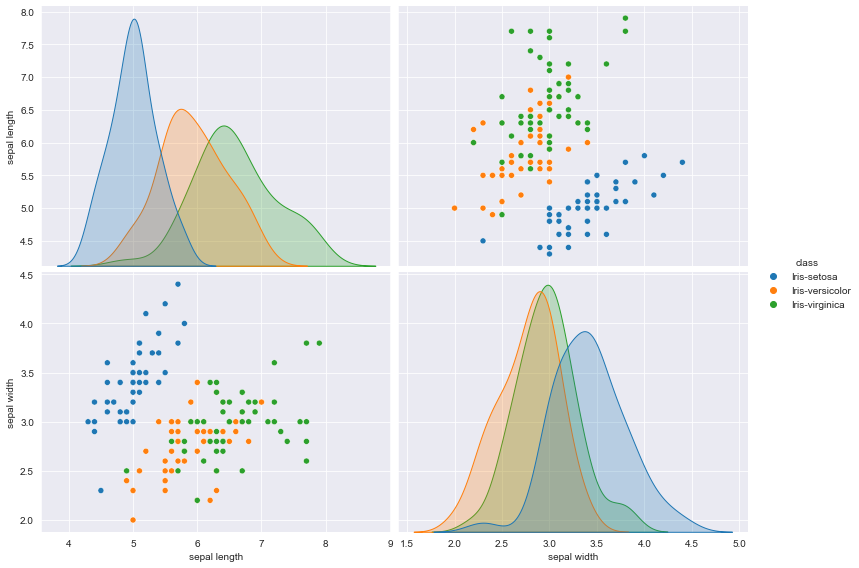

In [9]:
sns.set_style('darkgrid')
sns.pairplot(df[['sepal length','sepal width', 'class']], hue='class', height=4, aspect=4/3)

<AxesSubplot:>

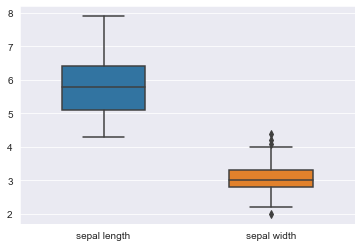

In [10]:
sns.set_style('darkgrid')
sns.boxplot(data=df[['sepal length', 'sepal width']], width=0.5)

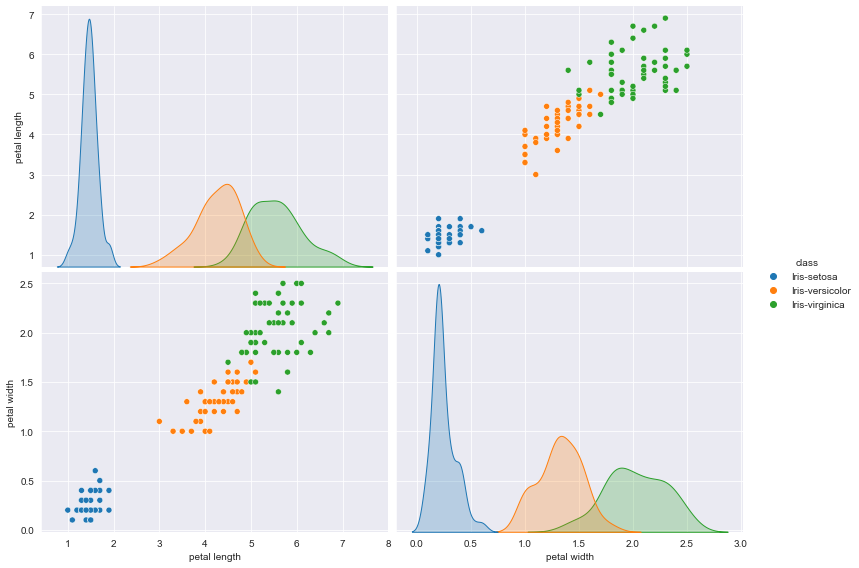

In [11]:
sns.set_style('darkgrid')
sns.pairplot(df[['petal length','petal width', 'class']], hue='class', height=4, aspect=4/3)

<AxesSubplot:>

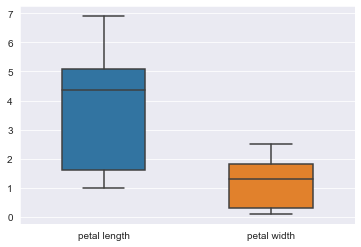

In [12]:
sns.set_style('darkgrid')
sns.boxplot(data=df[['petal length', 'petal width']], width=0.5)

# Implementation of SVM

In [13]:
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import train_test_split

In [14]:
x = df[['sepal length', 'sepal width']]
y = df['class']
# mapping object type to numerical type
y = pd.factorize(y)[0]

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# Visualizing two features based on different classes

In [16]:
df_visual = pd.DataFrame(data = np.c_[x,y], columns=['x1','x2','class'])

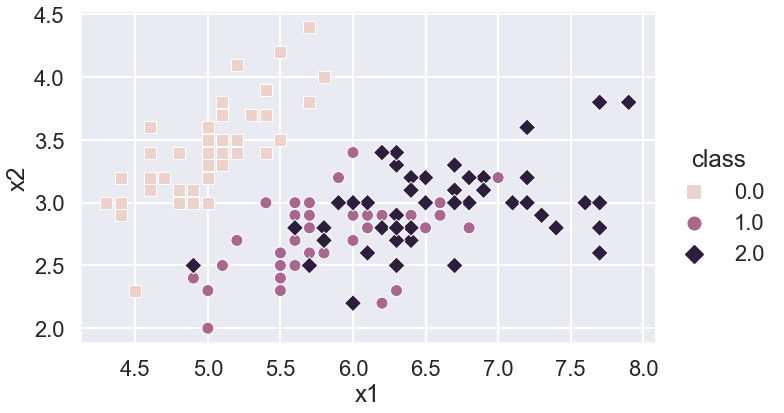

In [17]:
sns.set_theme(context='poster')
ax = sns.pairplot(data=df_visual, x_vars=['x1'], y_vars=['x2'], height=6, aspect=8/5, hue='class', markers=["s", "o", "D"])

# Defining functions for drawing decision surface and boundaries

In [18]:
def drawGrid(x, y, h=0.02):
    x_min, x_max = x.min()-1, x.max()+1
    y_min, y_max = y.min()-1, y.max()+1
    x_surface, y_surface = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return x_surface, y_surface

In [19]:
def drawSurface(x1, x2, y, model, model_name):
    rcParams['axes.titlepad'] = 30 
    x_surface, y_surface = drawGrid(x1, x2)
    z = model.predict(np.c_[x_surface.ravel(), y_surface.ravel()]).reshape(x_surface.shape)
    _ = plt.figure(figsize=(10,6))
    plt.contourf(x_surface, y_surface, z, cmap=plt.cm.Dark2_r, alpha=0.3)
    plt.scatter(x1, x2, c=y, cmap=plt.cm.Dark2_r, marker='x')
    plt.xlim(x_surface.min(), x_surface.max())
    plt.ylim(y_surface.min(), y_surface.max())
    plt.xlabel("Sepal Length")
    plt.ylabel("Sepal Width")
    plt.title(f'Decision surface for {model_name} model')
    plt.show()

In [20]:
x1 = x.iloc[:,0]
x2 = x.iloc[:,1]

# I) Linear SVC

In [21]:
model = LinearSVC(C=10, max_iter=1000, random_state=0)

In [22]:
model.fit(x_train, y_train)
print("Score of Training set:", model.score(x_train, y_train))
print("Score of Testing set:", model.score(x_test, y_test))

Score of Training set: 0.8285714285714286
Score of Testing set: 0.6888888888888889


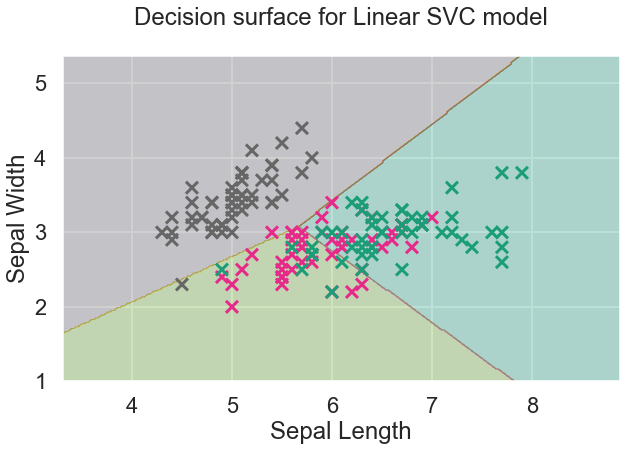

In [23]:
drawSurface(x1, x2, y, model, "Linear SVC")

# II) Trying different Kernels

## 1) Linear Kernel

In [24]:
model2 = SVC(C=10, kernel='linear')

In [25]:
model2.fit(x_train, y_train)
print("Train Score:", model2.score(x_train, y_train))
print("Test Score:", model2.score(x_test, y_test))

Train Score: 0.8285714285714286
Test Score: 0.8


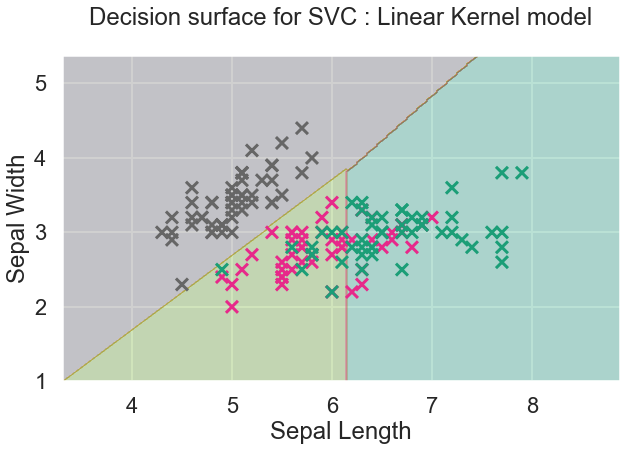

In [26]:
drawSurface(x1, x2, y, model2, "SVC : Linear Kernel")

## 2) Polynomial Kernel

In [27]:
# finding best degree
for d in range(1,11):
    model3 = SVC(C=10, kernel='poly', degree=d)
    model3.fit(x_train, y_train)
    print(f"Degree= {round(d,3)} : Score= {round(model3.score(x_test, y_test),3)}")

Degree= 1 : Score= 0.8
Degree= 2 : Score= 0.8
Degree= 3 : Score= 0.778
Degree= 4 : Score= 0.778
Degree= 5 : Score= 0.8
Degree= 6 : Score= 0.8
Degree= 7 : Score= 0.689
Degree= 8 : Score= 0.8
Degree= 9 : Score= 0.689
Degree= 10 : Score= 0.8


In [29]:
model3 = SVC(C=10, kernel='poly', degree=2)
model3.fit(x_train, y_train)
print("Train Score:", model3.score(x_train, y_train))
print("Test Score:", model3.score(x_test, y_test))

Train Score: 0.819047619047619
Test Score: 0.8


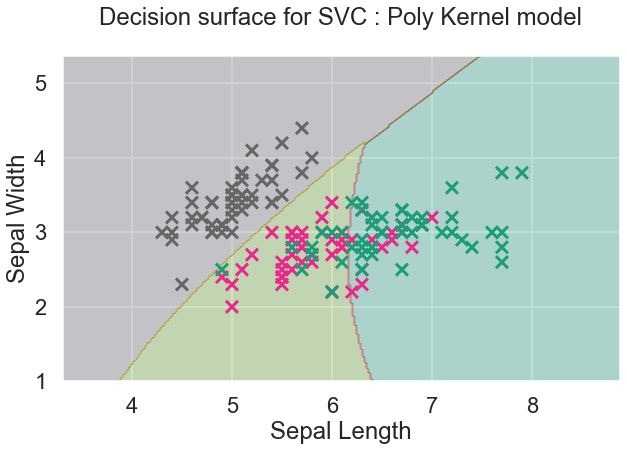

In [30]:
drawSurface(x1, x2, y, model3, "SVC : Poly Kernel")

## 3) RBF Kernel

In [33]:
# finding best gamma
for g in np.linspace(0.1,1,10):
    model4 = SVC(C=10, kernel='rbf', gamma=g)
    model4.fit(x_train, y_train)
    print(f"gamma= {round(g,3)} : Score={round(model4.score(x_test, y_test),3)}")

gamma= 0.1 : Score=0.8
gamma= 0.2 : Score=0.822
gamma= 0.3 : Score=0.778
gamma= 0.4 : Score=0.778
gamma= 0.5 : Score=0.778
gamma= 0.6 : Score=0.756
gamma= 0.7 : Score=0.756
gamma= 0.8 : Score=0.733
gamma= 0.9 : Score=0.733
gamma= 1.0 : Score=0.733


In [34]:
model4 = SVC(C=10, kernel='rbf', gamma=0.2)

In [35]:
model4.fit(x_train, y_train)
print("Train Score:", model4.score(x_train, y_train))
print("Test Score:", model4.score(x_test, y_test))

Train Score: 0.8285714285714286
Test Score: 0.8222222222222222


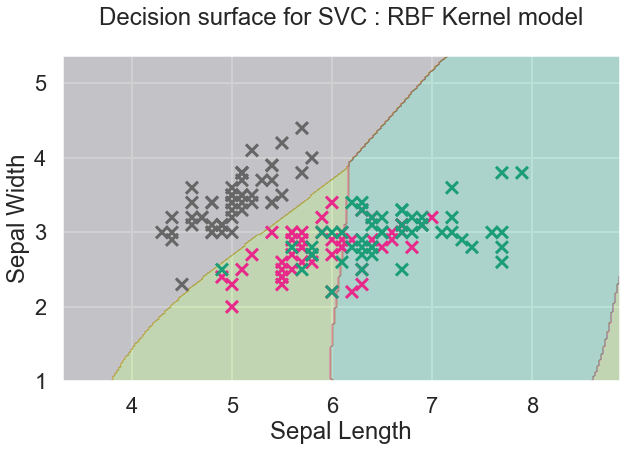

In [36]:
drawSurface(x1, x2, y, model4, "SVC : RBF Kernel")